<?xml version="1.0" encoding="UTF-8"?>
<html>
  <body>
    <header></header>
        <CENTER>
          <img src="https://www.uvv.br/wp-content/themes/uvvBr/templates/assets//img/logouvv.svg" alt="UVV-LOGO" style = width="100px"; height="100px">
        </CENTER>
        <CENTER><b>ANÁLISE DE DADOS</b></CENTER>
        <CENTER><b>AOP2 - ATIVIDADE ONLINE PONTUADA 2</b></CENTER><br/>

**NOME COMPLETO: Otávio Theodoro de Bortoli Villela Santos** 

#ATIVIDADE ONLINE PONTUADA – AOP2

**Link do Arquivo table.csv**: [Clique Aqui!](https://drive.google.com/file/d/1mT9HM6oirjvuXZkFTZRQyFWRebX3fS3B/view?usp=sharing)

# Carregar o Dataset (arquivo)

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# importe outras bibliotecas que vc julgar necessário.

In [9]:
table = pd.read_csv('table.csv', index_col = 0)

In [10]:
table.head()

,CÓDIGO,REGIÃO,SEXO,PAGAMENTO,TOTAL (R$)
0,5151,SULDESTE,MASCULINO,DÉBITO,6872.16
1,6604,SUL,FEMININO,CRÉDITO,5219.01
2,6539,SULDESTE,MASCULINO,DÉBITO,9945.68
3,6922,SULDESTE,FEMININO,CRÉDITO,9993.06
4,4546,SULDESTE,MASCULINO,CRÉDITO,5536.25


# **A partir do Dataset: table.csv, conforme as colunas do enunciado:**

Resposta as seguintes questões:

# **QUESTÃO a):**

Faça a análise de Perfil de cliente por agregação: SEXO x PAGAMENTO x TOTAL (plot) e seu Box Plot.

Resumo por SEXO e PAGAMENTO:
        SEXO PAGAMENTO  Contagem        Media   Mediana         Soma  \
0   FEMININO   CRÉDITO       858  5144.498263  5123.735   4413979.51   
1   FEMININO    DÉBITO       324  5369.523519  5589.295   1739725.62   
2  MASCULINO   CRÉDITO      2795  5165.453317  5131.460  14437442.02   
3  MASCULINO    DÉBITO      1023  5226.743558  5322.010   5346958.66   

   Desvio_Padrao  
0    2994.000749  
1    2934.495817  
2    3012.914105  
3    3050.031112  


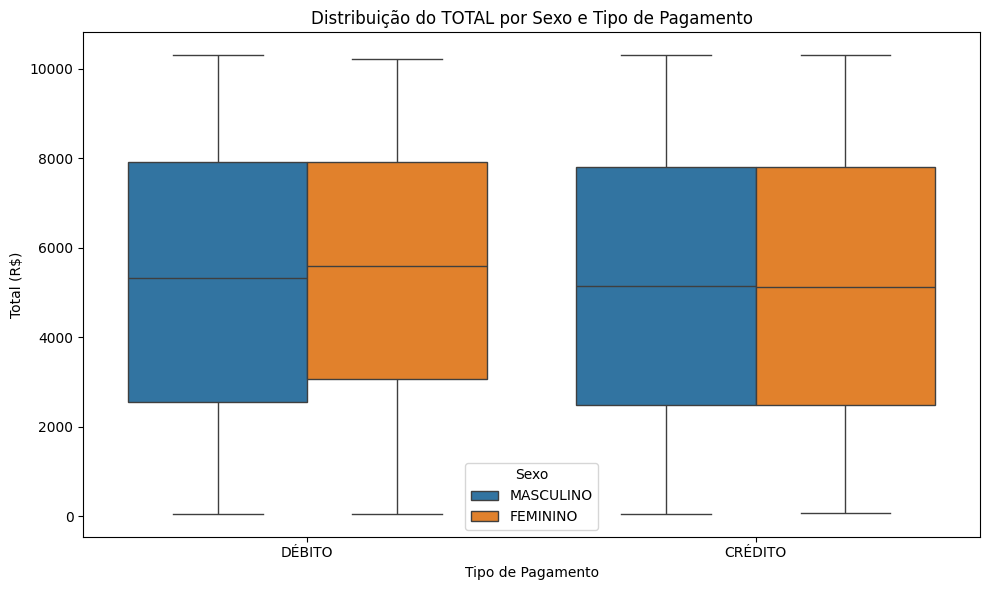

In [11]:
# 1. Renomear a coluna de total para facilitar o código
table.rename(columns={'TOTAL (R$)': 'TOTAL'}, inplace=True)

# 2. Agregar os dados por SEXO e PAGAMENTO
agrupado = table.groupby(['SEXO', 'PAGAMENTO']).agg(
    Contagem=('TOTAL', 'count'),
    Media=('TOTAL', 'mean'),
    Mediana=('TOTAL', 'median'),
    Soma=('TOTAL', 'sum'),
    Desvio_Padrao=('TOTAL', 'std')
).reset_index()

# 3. Exibir o resumo estatístico
print("Resumo por SEXO e PAGAMENTO:")
print(agrupado)

# 4. Criar boxplot da distribuição do TOTAL
plt.figure(figsize=(10, 6))
sns.boxplot(x='PAGAMENTO', y='TOTAL', hue='SEXO', data=table)

plt.title('Distribuição do TOTAL por Sexo e Tipo de Pagamento')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Total (R$)')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

# **QUESTÃO b):**

Faça a análise de Perfil de cliente por agregação: REGIÃO x PAGAMENTO x TOTAL (plot) e seu Box Plot.

Resumo por REGIÃO e PAGAMENTO:
         REGIÃO PAGAMENTO  Contagem        Media   Mediana         Soma  \
0  CENTRO-OESTE   CRÉDITO       180  5379.152111  5348.790    968247.38   
1  CENTRO-OESTE    DÉBITO        62  4932.537097  4752.935    305817.30   
2      NORDESTE   CRÉDITO       116  5345.078448  5639.250    620029.10   
3      NORDESTE    DÉBITO        44  5633.982955  5863.275    247895.25   
4         NORTE   CRÉDITO        85  4575.308471  4315.700    388901.22   
5         NORTE    DÉBITO        26  5152.218462  5394.110    133957.68   
6           SUL   CRÉDITO       711  5079.154543  5053.180   3611278.88   
7           SUL    DÉBITO       280  5258.013893  5314.285   1472243.89   
8      SULDESTE   CRÉDITO      2561  5178.822706  5175.750  13262964.95   
9      SULDESTE    DÉBITO       935  5269.272898  5384.840   4926770.16   

   Desvio_Padrao  
0    2861.522746  
1    3075.908213  
2    3104.812837  
3    3277.175114  
4    2811.016667  
5    2911.557647  
6    2970.

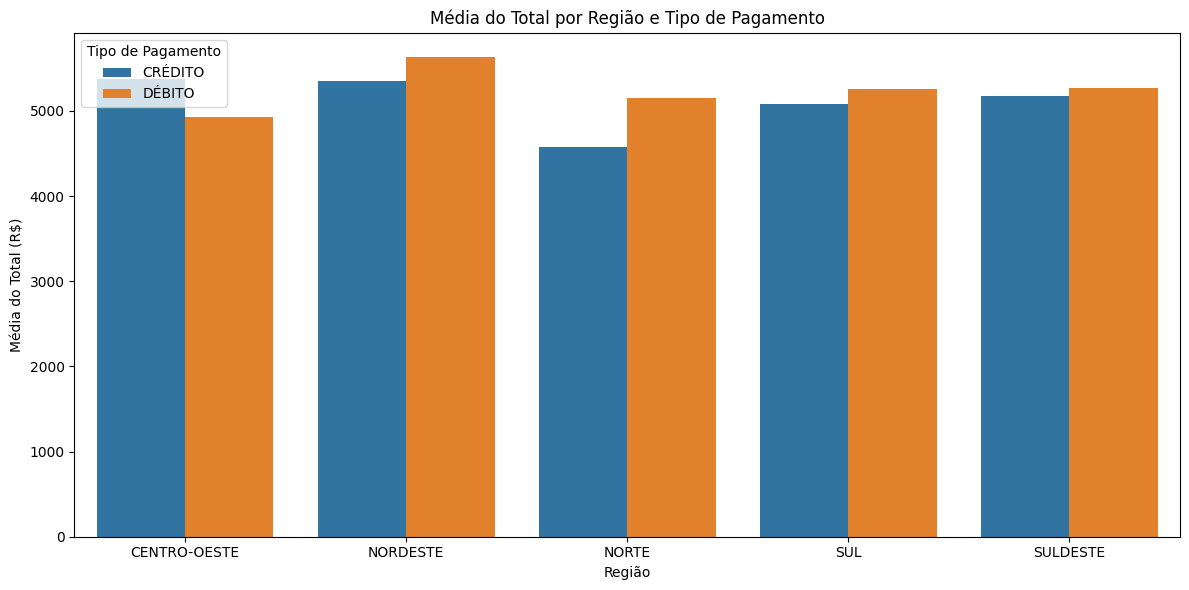

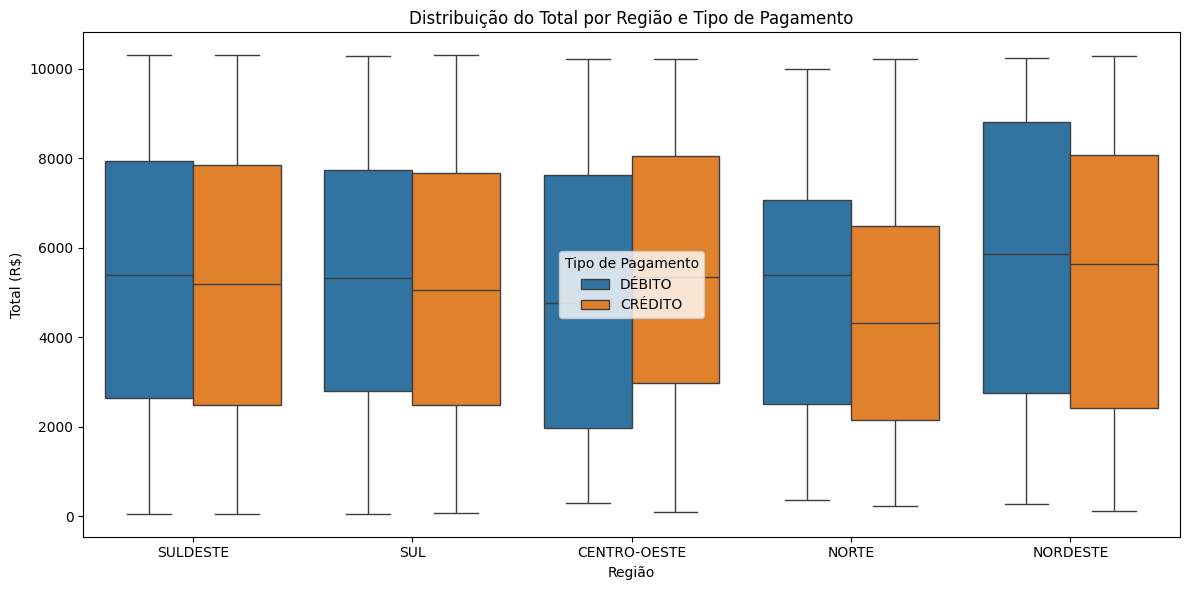

In [12]:
agrupado = table.groupby(['REGIÃO', 'PAGAMENTO']).agg(
    Contagem=('TOTAL', 'count'),
    Media=('TOTAL', 'mean'),
    Mediana=('TOTAL', 'median'),
    Soma=('TOTAL', 'sum'),
    Desvio_Padrao=('TOTAL', 'std')
).reset_index()

# 3. Exibir o resumo estatístico
print("Resumo por REGIÃO e PAGAMENTO:")
print(agrupado)

# 4. Gráfico de barras da média de TOTAL por REGIÃO e PAGAMENTO
plt.figure(figsize=(12, 6))
sns.barplot(data=agrupado, x='REGIÃO', y='Media', hue='PAGAMENTO')
plt.title('Média do Total por Região e Tipo de Pagamento')
plt.ylabel('Média do Total (R$)')
plt.xlabel('Região')
plt.legend(title='Tipo de Pagamento')
plt.tight_layout()
plt.show()

# 5. Boxplot da distribuição do TOTAL por REGIÃO e PAGAMENTO
plt.figure(figsize=(12, 6))
sns.boxplot(data=table, x='REGIÃO', y='TOTAL', hue='PAGAMENTO')
plt.title('Distribuição do Total por Região e Tipo de Pagamento')
plt.ylabel('Total (R$)')
plt.xlabel('Região')
plt.legend(title='Tipo de Pagamento')
plt.tight_layout()
plt.show()

# **QUESTÃO c):**

Faça a análise estatística, com o info e o describe, sobre os dados dos clientes.

In [13]:
# 1. Ver informações gerais sobre o DataFrame
print("📋 Informações da base de dados:")
table.info()

print("\n📊 Estatísticas descritivas:")
# 2. Ver estatísticas descritivas da base
print(table.describe())

📋 Informações da base de dados:
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CÓDIGO     5000 non-null   int64  
 1   REGIÃO     5000 non-null   object 
 2   SEXO       5000 non-null   object 
 3   PAGAMENTO  5000 non-null   object 
 4   TOTAL      5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 234.4+ KB

📊 Estatísticas descritivas:
            CÓDIGO         TOTAL
count  5000.000000   5000.000000
mean   5488.152600   5187.621162
std    2590.132201   3011.918179
min    1001.000000     52.530000
25%    3260.750000   2517.320000
50%    5499.000000   5198.410000
75%    7707.250000   7825.682500
max    9998.000000  10295.880000


# **QUESTÃO d):**

Enumere 3 características inferidas encontradas a partir dos resultados estatísticos obtidos nos itens a), b) e c):

1.   Característica 1:
A base de dados está completa e sem valores ausentes, o que garante confiabilidade nas análises. Todos os 5.000 registros têm informações preenchidas em todas as colunas.

2.   Característica 2:
Os valores da coluna TOTAL possuem alta variabilidade, com um desvio padrão de aproximadamente R$ 3.011, o que indica grande diferença entre os gastos dos clientes — há desde valores muito baixos (~R$ 52) até gastos acima de R$ 10.000.

3.   Característica 3: 
A distribuição de gastos varia entre regiões e formas de pagamento, conforme os boxplots mostraram. Por exemplo, certas regiões apresentam maior concentração de gastos altos com um tipo específico de pagamento (como cartão de crédito), sugerindo perfis de consumo distintos por localização geográfica.

# **OBSERVAÇÃO IMPORTANTE:**

**PARA ENTREGAR A ATIVIDADE:**

OBRIGATÓRIO: Faça a impressão do seu **Notebook Colab (.ipynb) no formato PDF (Acrobat): .PDF** e faça o upload no AVA: AOP2.pdf.

#CONVERTER IPYNB para PDF

PASSO A PASSO:

1.   Fazer o download do seu IPYNB.
2.   Fazer o upload do seu IPYNB para área temporária: content.
3.   Rodar o código abaixo com seu NOME_DO_COLAB.ipynb: Gerar um HTML.
4.   Fazer o download do seu HTML e abrir em um Browser qualquer.
3.   Imprimir a página HTML em PDF. Pronto (UFA)::: 😅!

In [14]:
%%shell
jupyter nbconvert --to html /content/NOME_DO_COLAB.ipynb

UsageError: Cell magic `%%shell` not found.


**NÃO ENVIAR O ARQUIVO COLAB: .IPYNB**

**FAÇA AQUI UM LINK PARA O PROFESSOR** (COMPARTILHADO COM TODOS): [https://1drv.ms/u/c/43eebf60cebf2fdb/EbUfD5zBYvFGtxAqcnb91BIBN_564Q6uTWPiYtsKyTj_rg?e=w0pXwh]